In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import glob
import seaborn as sns
from scipy.interpolate import griddata


In [9]:
file_path = './diff_base_games/diff_base_games.csv'
df = pd.read_csv(file_path)

# df set P to float
df['P'] = df['P'].astype(float)
df['R'] = df['R'].astype(float)
df['T'] = df['T'].astype(float)
df['S'] = df['S'].astype(float)
# Define the correct mapping of game configurations to names
correct_game_mapping = {
    (0.0, 0.0, 0.0, 0.0): 'Trivial',
    (1.0, 1.0, 0.0, 0.0): 'Coordination',
    (1.0, 3.0, 0.0, 0.0): 'Hi-Lo',
    (0.0, 1.0, 3.0, 2.0): 'Take Turns',
    (0.0, 3.0, 4.0, 2.0): 'Chicken',
    (1.0, 3.0, 2.0, 0.0): 'Stag Hunt',
    (1.0, 3.0, 4.0, 0.0): 'PD'
}


# Apply the correct mapping to create a new column with game names
df['game_name'] = df.apply(lambda row: correct_game_mapping.get((row['P'], row['R'], row['T'], row['S'])), axis=1)


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/250337114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/250337114.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


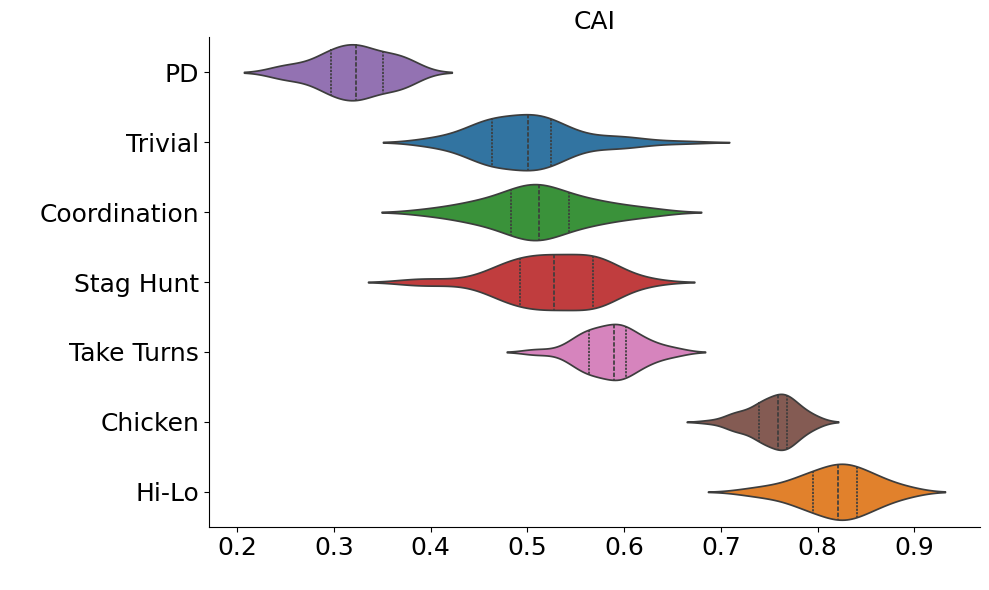

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/250337114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/250337114.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


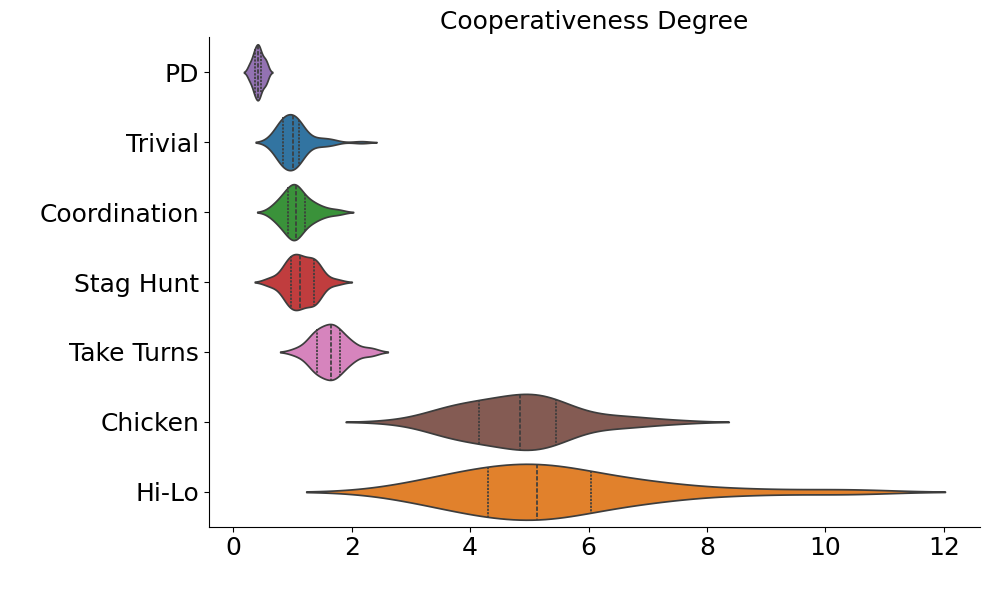

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/250337114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/250337114.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


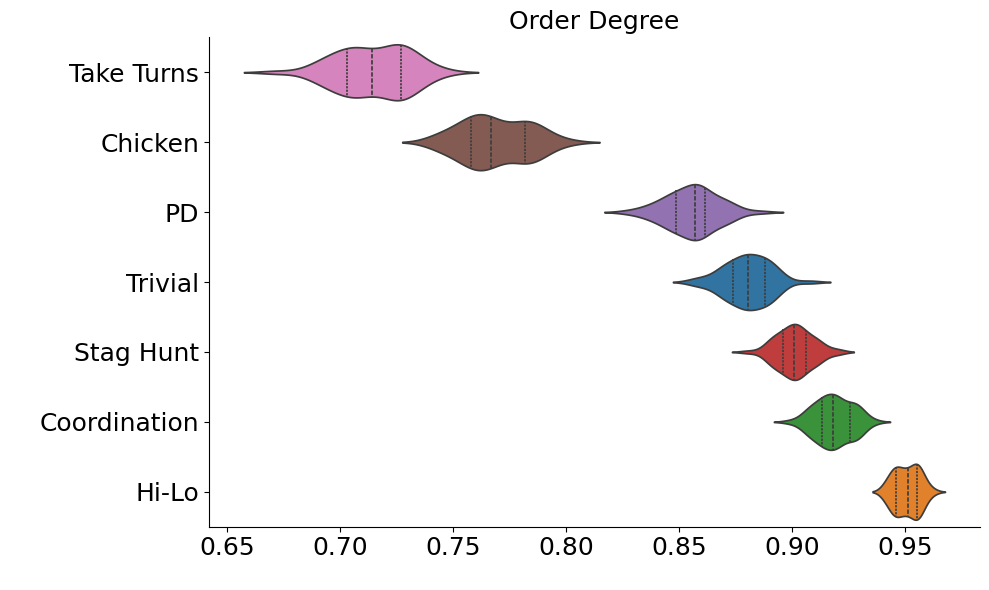

In [10]:
games = df['game_name'].unique()
colors = sns.color_palette("tab10", len(games))
color_mapping = dict(zip(games, colors))

# Function to plot violin plots ordered by median values
def plot_ordered_violinplot(df, column, title, ylabel):
    # Calculate the medians
    fontsize=18
    medians = df.groupby('game_name')[column].median().sort_values()
    ordered_df = df[df['game_name'].isin(medians.index)].copy()
    ordered_df['game_name'] = pd.Categorical(ordered_df['game_name'], categories=medians.index, ordered=True)
    
    # Plotting the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
    
    # Adding titles and labels
    plt.title(title, fontsize=fontsize)
    plt.xlabel(' ')
    plt.ylabel(ylabel, fontsize=fontsize)
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=0, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    # # Creating a custom legend
    # legend_elements = [Patch(facecolor=color_mapping[game], label=game) for game in medians.index]
    # plt.legend(handles=legend_elements, title='Game Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Despining the plot
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'{column}_violinplot.pdf')
    plt.show()

# Plot CAI
plot_ordered_violinplot(df, 'cai', 'CAI', ' ')

# Plot Cooperativeness Degree
plot_ordered_violinplot(df, 'coop_degree', 'Cooperativeness Degree', ' ')

# Plot Order Degree
plot_ordered_violinplot(df, 'order_degree', 'Order Degree', ' ')


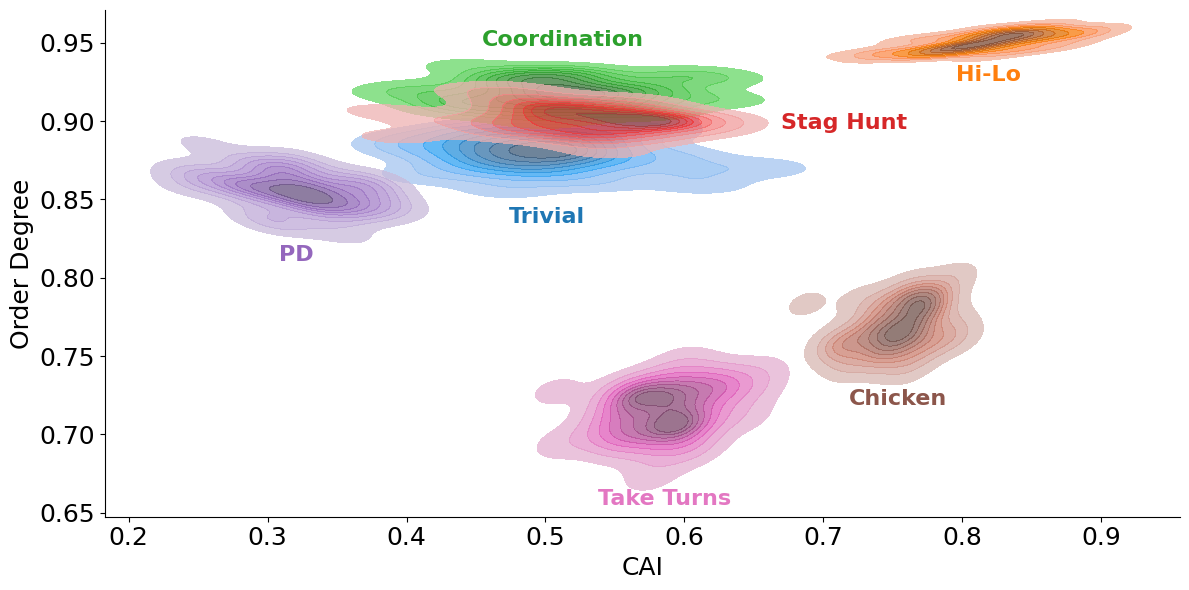

In [11]:
# Define the figure
fontsize=16
plt.figure(figsize=(12, 6))

games = df['game_name'].unique()
colors = sns.color_palette("tab10", len(games))
color_mapping = dict(zip(games, colors))

# Plot the density plot for each game type with improved colors
for game, color in color_mapping.items():
    subset = df[df['game_name'] == game]
    sns.kdeplot(x=subset['cai'], y=subset['order_degree'], fill=True, alpha=0.75, color=color)
    
    # Add text labels near the kde plots
    mean_cai = subset['cai'].mean()
    mean_order_degree = subset['order_degree'].mean()

    if game == 'PD':
        plt.text(mean_cai, mean_order_degree-0.045, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    elif game == 'Take Turns':
        plt.text(mean_cai, mean_order_degree-0.06, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    elif game == 'Hi-Lo':
        plt.text(mean_cai, mean_order_degree-0.025, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    elif game == 'Trivial':
        plt.text(mean_cai, mean_order_degree-0.045, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    elif game == 'Stag Hunt':
        plt.text(mean_cai + 0.19, mean_order_degree-0.006, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    elif game == 'Coordination':
        plt.text(mean_cai, mean_order_degree+0.03, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    elif game == 'Chicken':
        plt.text(mean_cai, mean_order_degree-0.05, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

    

# Set labels and title
plt.xlabel('CAI', fontsize=18)
plt.ylabel('Order Degree', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('')
sns.despine()

# Create custom legend
from matplotlib.lines import Line2D

# legend_elements = [Line2D([0], [0], marker='o', color='w', label=game, markersize=10, markerfacecolor=color)
#                    for game, color in zip(df['game_name'].unique(), colors)]
#plt.legend(handles=legend_elements, title='Game Types', loc='upper right', bbox_to_anchor=(1, 0.85), frameon=False, fontsize=16, title_fontsize=16)  

# Adjust layout and save the plot

plt.subplots_adjust(left=0.2)  # Adjust the left parameter as needed

plt.tight_layout()
plt.savefig('cai_order_degree_density_plot.pdf')
plt.show()




/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1613725439.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='R_P_diff', y=column, data=df_filtered, palette='Greens', inner='quartile', scale='width',)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1613725439.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x='R_P_diff', y=column, data=df_filtered, palette='Greens', inner='quartile', scale='width',)


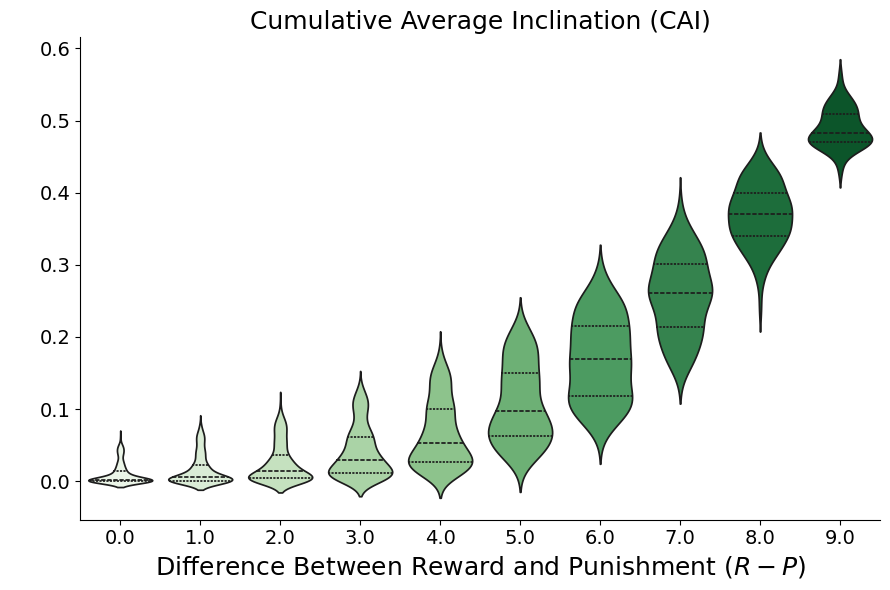

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1613725439.py:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


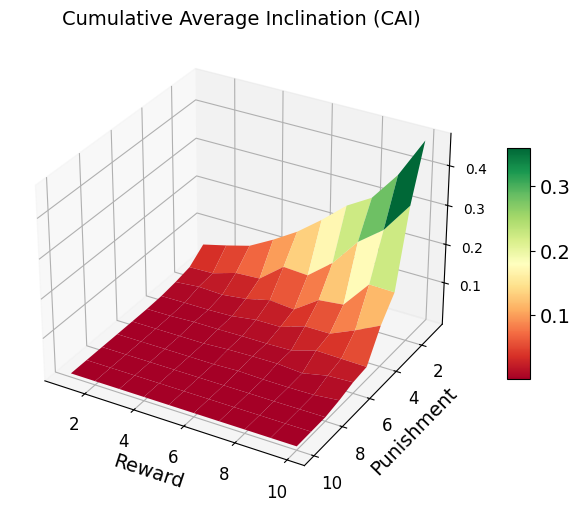

In [12]:
# Load the CSV file
file_path_new = './diff_payoffs2/diff_rewards_punishments.csv'
df_new = pd.read_csv(file_path_new)
fontsize = 18
# Set P, R, T, S to float
df_new['P'] = df_new['P'].astype(float)
df_new['R'] = df_new['R'].astype(float)
df_new['T'] = df_new['T'].astype(float)
df_new['S'] = df_new['S'].astype(float)

# Create a new column for the difference between R and P
df_new['R_P_diff'] = df_new['R'] - df_new['P']

# Function to plot boxplots grouped by R-P pairs without rotating x-ticks
def plot_boxplot_grouped_by_RP_diff_no_rotation(df, column, title, ylabel):
    df_filtered = df_new[df_new['R_P_diff'] >= 0]
    plt.figure(figsize=(9, 6))
    ax = sns.violinplot(x='R_P_diff', y=column, data=df_filtered, palette='Greens', inner='quartile', scale='width',)
    
    # Adding titles and labels
    plt.title(title, fontsize=fontsize)
    plt.xlabel('Difference Between Reward and Punishment ($R-P$)', fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Despining the plot
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"{column}_r_vs_p_boxplot.pdf")
    plt.show()

# Plot CAI for the difference between R and P without rotating x-ticks
plot_boxplot_grouped_by_RP_diff_no_rotation(df_new, 'cai', 'Cumulative Average Inclination (CAI)', ' ')

fontsize=14
# Extract the necessary data
R_values = df_new['R'].values
P_values = df_new['P'].values
CAI_values = df_new['cai'].values

# Create grid data for R and P with reversed P values for better visualization
unique_P_values = np.unique(P_values)[::-1]
grid_R, grid_P = np.meshgrid(np.unique(R_values), unique_P_values)

# Interpolate CAI values on the grid
grid_CAI = griddata((R_values, P_values), CAI_values, (grid_R, grid_P), method='cubic')

# Plotting the 3D mesh surface
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
cmap = sns.color_palette("RdYlGn", as_cmap=True)

surf = ax.plot_surface(grid_R, grid_P, grid_CAI, cmap=cmap)

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.ax.tick_params(labelsize=fontsize)  # Adjust the labelsize parameter as needed

# Adding titles and labels
ax.set_title('Cumulative Average Inclination (CAI)', fontsize=fontsize)
ax.set_xlabel('Reward', fontsize=fontsize)
ax.set_ylabel('Punishment', fontsize=fontsize)
ax.set_zlabel(' ')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.zticks(fontsize=14)
# Reverse the direction of the Y-axis
ax.invert_yaxis()

# Add color bar
plt.tight_layout()
plt.savefig('cai_r_vs_p_3d.pdf')
plt.show()


# With Network

## Local, Local

In [13]:
file_path = './diff_base_games_local_local_network/diff_base_games_local_local_network.csv'
df = pd.read_csv(file_path)
# df set P to float
df['P'] = df['P'].astype(float)
df['R'] = df['R'].astype(float)
df['T'] = df['T'].astype(float)
df['S'] = df['S'].astype(float)
# Define the correct mapping of game configurations to names
correct_game_mapping = {
    (0.0, 0.0, 0.0, 0.0): 'Trivial',
    (1.0, 1.0, 0.0, 0.0): 'Coordination',
    (1.0, 3.0, 0.0, 0.0): 'Hi-Lo',
    (0.0, 1.0, 3.0, 2.0): 'Take Turns',
    (0.0, 3.0, 4.0, 2.0): 'Chicken',
    (1.0, 3.0, 2.0, 0.0): 'Stag Hunt',
    (1.0, 3.0, 4.0, 0.0): 'PD'
}


# Apply the correct mapping to create a new column with game names
df['game_name'] = df.apply(lambda row: correct_game_mapping.get((row['P'], row['R'], row['T'], row['S'])), axis=1)

df

,cai,coop_degree,order_degree,numsim,numrounds,R,S,T,P,tolerance,...,max_positive_pressure,max_negative_pressure,adv_mutation_rate,move_mutation_rate,weight_of_present_for_adv,weight_of_present_for_move,adv_reassess_frequency,move_reassess_frequency,move_increment,game_name
0,0.470368,0.601448,0.220276,1,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
1,0.493750,0.965747,0.224504,2,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
2,0.517922,1.317428,0.207864,3,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
3,0.517061,1.146894,0.225660,4,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
4,0.479620,0.915338,0.192254,5,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.539122,1.716065,0.129540,46,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns
346,0.541738,2.611495,0.115120,47,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns
347,0.535438,2.436489,0.118552,48,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns
348,0.533695,1.932299,0.101264,49,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/711691998.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/711691998.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


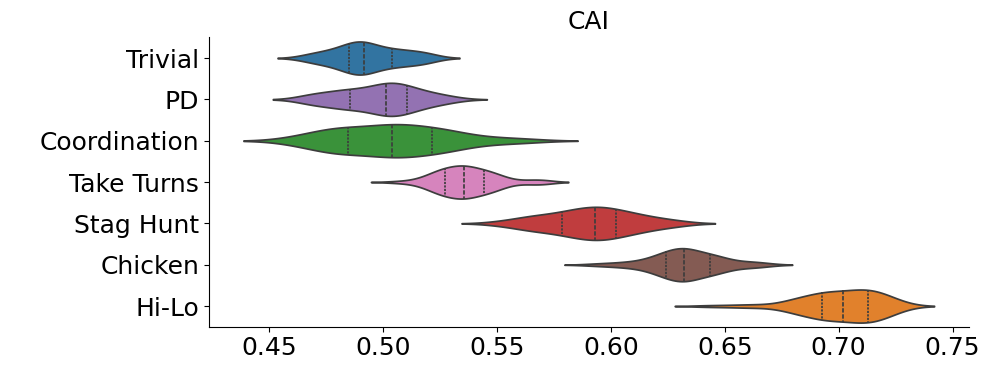

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/711691998.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/711691998.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


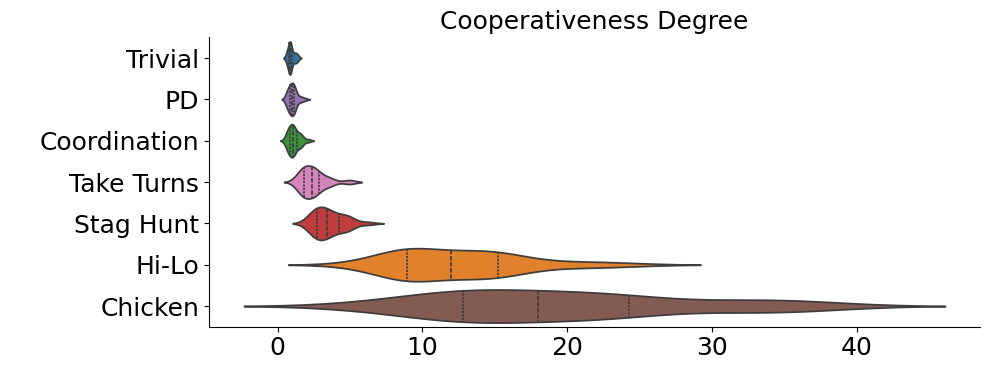

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/711691998.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/711691998.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


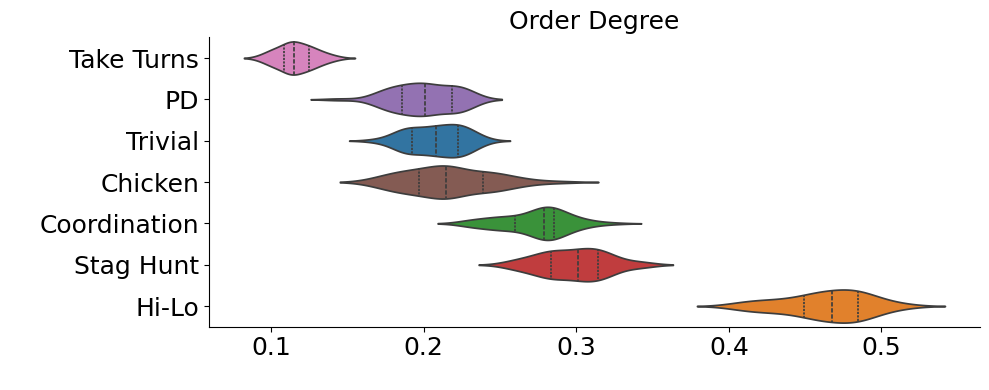

In [14]:
games = df['game_name'].unique()
colors = sns.color_palette("tab10", len(games))
color_mapping = dict(zip(games, colors))

# Function to plot violin plots ordered by median values
def plot_ordered_violinplot(df, column, title, ylabel):
    # Calculate the medians
    fontsize=18
    medians = df.groupby('game_name')[column].median().sort_values()
    ordered_df = df[df['game_name'].isin(medians.index)].copy()
    ordered_df['game_name'] = pd.Categorical(ordered_df['game_name'], categories=medians.index, ordered=True)
    
    # Plotting the violin plot
    plt.figure(figsize=(10, 4))
    sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
    
    # Adding titles and labels
    plt.title(title, fontsize=fontsize)
    plt.xlabel(' ')
    plt.ylabel(ylabel, fontsize=fontsize)
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=0, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    # # Creating a custom legend
    # legend_elements = [Patch(facecolor=color_mapping[game], label=game) for game in medians.index]
    # plt.legend(handles=legend_elements, title='Game Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Despining the plot
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'{column}_violinplot_local_local_network.pdf')
    plt.show()

# Plot CAI
plot_ordered_violinplot(df, 'cai', 'CAI', ' ')

# Plot Cooperativeness Degree
plot_ordered_violinplot(df, 'coop_degree', 'Cooperativeness Degree', ' ')

# Plot Order Degree
plot_ordered_violinplot(df, 'order_degree', 'Order Degree', ' ')


## Global, Global

In [15]:
file_path = './diff_base_games_global_global_network/diff_base_games_global_global_network.csv'
df = pd.read_csv(file_path)

# df set P to float
df['P'] = df['P'].astype(float)
df['R'] = df['R'].astype(float)
df['T'] = df['T'].astype(float)
df['S'] = df['S'].astype(float)
# Define the correct mapping of game configurations to names
correct_game_mapping = {
    (0.0, 0.0, 0.0, 0.0): 'Trivial',
    (1.0, 1.0, 0.0, 0.0): 'Coordination',
    (1.0, 3.0, 0.0, 0.0): 'Hi-Lo',
    (0.0, 1.0, 3.0, 2.0): 'Take Turns',
    (0.0, 3.0, 4.0, 2.0): 'Chicken',
    (1.0, 3.0, 2.0, 0.0): 'Stag Hunt',
    (1.0, 3.0, 4.0, 0.0): 'PD'
}


# Apply the correct mapping to create a new column with game names
df['game_name'] = df.apply(lambda row: correct_game_mapping.get((row['P'], row['R'], row['T'], row['S'])), axis=1)

df

,cai,coop_degree,order_degree,numsim,numrounds,R,S,T,P,tolerance,...,max_positive_pressure,max_negative_pressure,adv_mutation_rate,move_mutation_rate,weight_of_present_for_adv,weight_of_present_for_move,adv_reassess_frequency,move_reassess_frequency,move_increment,game_name
0,0.570946,1.360249,0.866044,1,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
1,0.523341,1.088961,0.842150,2,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
2,0.552671,1.286152,0.855650,3,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
3,0.535491,1.174199,0.875148,4,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
4,0.472725,0.894133,0.851426,5,500000,0.0,0.0,0.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Trivial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.487674,0.904841,0.598359,46,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns
346,0.628136,2.208690,0.638631,47,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns
347,0.614407,2.008968,0.635505,48,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns
348,0.589505,1.787010,0.652243,49,500000,1.0,2.0,3.0,0.0,0.05,...,6.0,6.0,0.2,0.15,0.3,0.2,0.03,0.1,0.15,Take Turns


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1334370692.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1334370692.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


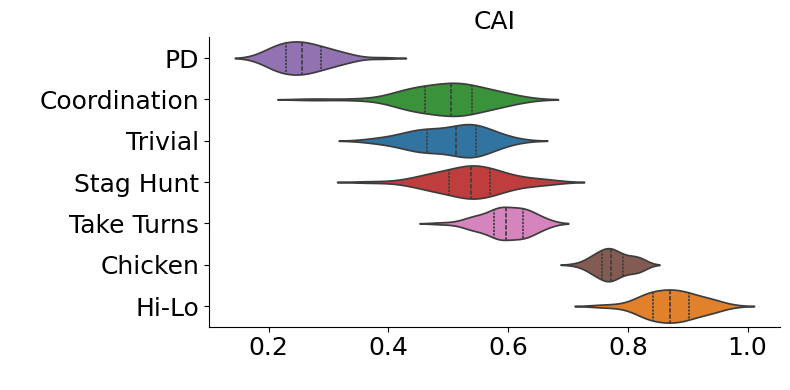

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1334370692.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1334370692.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


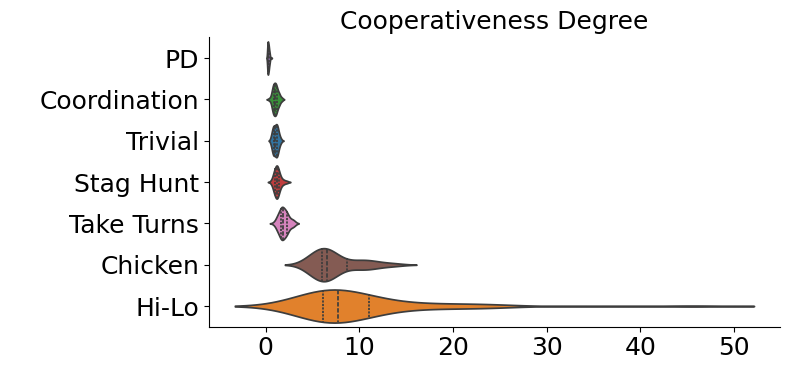

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1334370692.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41913/1334370692.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)


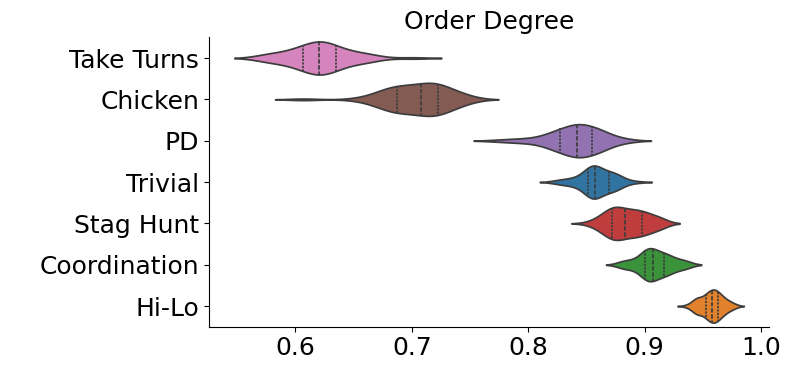

In [16]:
games = df['game_name'].unique()
colors = sns.color_palette("tab10", len(games))
color_mapping = dict(zip(games, colors))

# Function to plot violin plots ordered by median values
def plot_ordered_violinplot(df, column, title, ylabel):
    # Calculate the medians
    fontsize=18
    medians = df.groupby('game_name')[column].median().sort_values()
    ordered_df = df[df['game_name'].isin(medians.index)].copy()
    ordered_df['game_name'] = pd.Categorical(ordered_df['game_name'], categories=medians.index, ordered=True)
    
    # Plotting the violin plot
    plt.figure(figsize=(8, 4))
    sns.violinplot(y='game_name', x=column, data=ordered_df, inner='quartile', scale='width', palette=color_mapping)
    
    # Adding titles and labels
    plt.title(title, fontsize=fontsize)
    plt.xlabel(' ')
    plt.ylabel(ylabel, fontsize=fontsize)
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=0, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    # # Creating a custom legend
    # legend_elements = [Patch(facecolor=color_mapping[game], label=game) for game in medians.index]
    # plt.legend(handles=legend_elements, title='Game Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Despining the plot
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'{column}_violinplot_global_global_network.pdf')
    plt.show()

# Plot CAI
plot_ordered_violinplot(df, 'cai', 'CAI', ' ')

# Plot Cooperativeness Degree
plot_ordered_violinplot(df, 'coop_degree', 'Cooperativeness Degree', ' ')

# Plot Order Degree
plot_ordered_violinplot(df, 'order_degree', 'Order Degree', ' ')


## Comparing Local and Global Results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth', 'linestyle'
  cset = contour_func(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth', 'linestyle'
  cset = contour_func(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth', 'linestyle'
  cset = contour_func(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth', 'linestyle'
  cset = contour_func(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: 

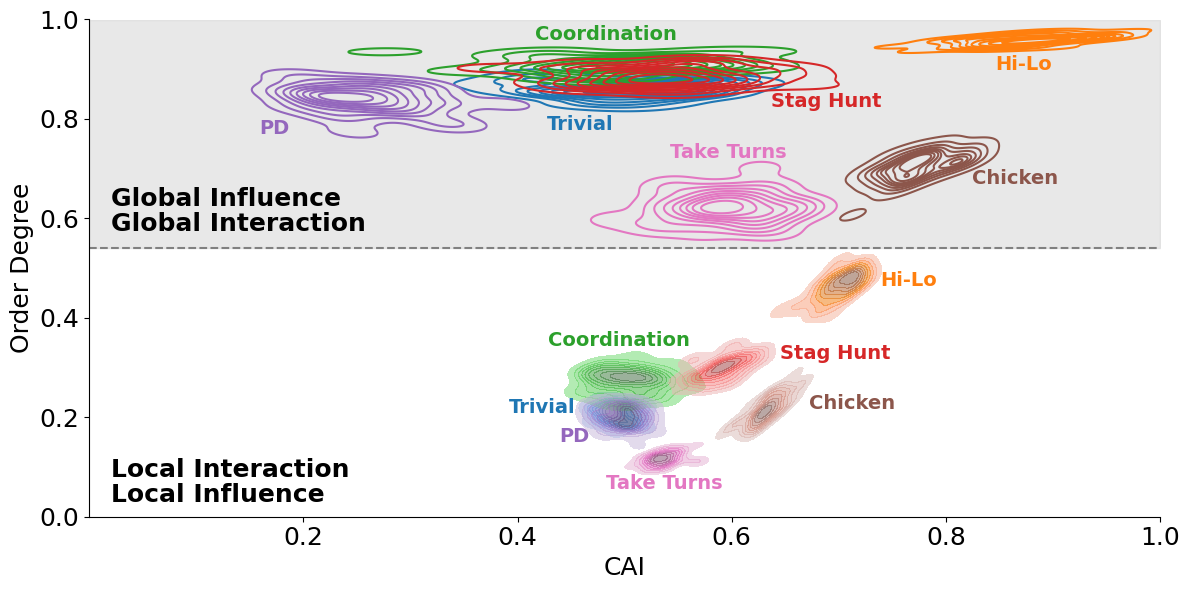

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path_global = './diff_base_games_global_global_network/diff_base_games_global_global_network.csv'
file_path_local = './diff_base_games_local_local_network/diff_base_games_local_local_network.csv'

df_global = pd.read_csv(file_path_global)
df_local = pd.read_csv(file_path_local)

# Add a column to indicate the data type
df_global['type'] = 'global'
df_local['type'] = 'local'

# Concatenate the dataframes
df = pd.concat([df_global, df_local])

# Convert columns to float
df['P'] = df['P'].astype(float)
df['R'] = df['R'].astype(float)
df['T'] = df['T'].astype(float)
df['S'] = df['S'].astype(float)

# Define the correct mapping of game configurations to names
correct_game_mapping = {
    (0.0, 0.0, 0.0, 0.0): 'Trivial',
    (1.0, 1.0, 0.0, 0.0): 'Coordination',
    (1.0, 3.0, 0.0, 0.0): 'Hi-Lo',
    (0.0, 1.0, 3.0, 2.0): 'Take Turns',
    (0.0, 3.0, 4.0, 2.0): 'Chicken',
    (1.0, 3.0, 2.0, 0.0): 'Stag Hunt',
    (1.0, 3.0, 4.0, 0.0): 'PD'
}

# Apply the correct mapping to create a new column with game names
df['game_name'] = df.apply(lambda row: correct_game_mapping.get((row['P'], row['R'], row['T'], row['S'])), axis=1)

# Define the figure
plt.figure(figsize=(12, 6))

games = df['game_name'].unique()
colors = sns.color_palette("tab10", len(games))
color_mapping = dict(zip(games, colors))

# Plot the density plot for each game type with improved colors
for game, color in color_mapping.items():
    subset_local = df[(df['game_name'] == game) & (df['type'] == 'local')]
    subset_global = df[(df['game_name'] == game) & (df['type'] == 'global')]
    
    sns.kdeplot(x=subset_local['cai'], y=subset_local['order_degree'], fill=True, alpha=0.5, color=color)
    sns.kdeplot(x=subset_global['cai'], y=subset_global['order_degree'], fill=False, alpha=1, color=color, linewidth=2.5, linestyle='--')
    
    # Add text labels near the kde plots
    mean_cai_local = subset_local['cai'].mean()
    mean_order_degree_local = subset_local['order_degree'].mean()
    mean_cai_global = subset_global['cai'].mean()
    mean_order_degree_global = subset_global['order_degree'].mean()

    if game == 'PD':        
        plt.text(mean_cai_global-0.085, mean_order_degree_global-0.07, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local-0.045, mean_order_degree_local-0.0495, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

    if game == 'Trivial':        
        plt.text(mean_cai_global-0.045, mean_order_degree_global-0.08, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local-0.07, mean_order_degree_local, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

    if game == 'Coordination':        
        plt.text(mean_cai_global-0.015, mean_order_degree_global+0.05, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local-0.01, mean_order_degree_local + 0.0695, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

    if game == 'Stag Hunt':        
        plt.text(mean_cai_global+0.15, mean_order_degree_global-0.06, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local+0.105, mean_order_degree_local + 0.0195, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    if game == 'Take Turns':        
        plt.text(mean_cai_global, mean_order_degree_global+0.1, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local, mean_order_degree_local - 0.0595, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')
    if game == 'Chicken':        
        plt.text(mean_cai_global + 0.09, mean_order_degree_global - 0.035, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local+ 0.08, mean_order_degree_local, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

    if game == 'Hi-Lo':        
        plt.text(mean_cai_global, mean_order_degree_global - 0.06, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')

        plt.text(mean_cai_local + 0.065, mean_order_degree_local, game, horizontalalignment='center', size=fontsize, color=color, weight='semibold')


# Draw a light gray rectangle above the dashed line to separate global and local sections
plt.axhline(y=0.54, color='grey', linestyle='--')
plt.fill_betweenx(y=[0.54, 1], x1=0, x2=1, color='lightgrey', alpha=0.5)

# Add the "Global Interaction" and "Global Influence" text above the dashed line near the y-axis
plt.text(0.02, 0.575, 'Global Interaction', horizontalalignment='left', size=18, color='black', weight='bold')
plt.text(0.02, 0.625, 'Global Influence', horizontalalignment='left', size=18, color='black', weight='bold')

# Add the "Local Influence" and "Local Interaction" text just above the x-axis
plt.text(0.02, 0.03, 'Local Influence', horizontalalignment='left', size=18, color='black', weight='bold')
plt.text(0.02, 0.08, 'Local Interaction', horizontalalignment='left', size=18, color='black', weight='bold')

# Set labels and title
plt.xlabel('CAI', fontsize=18)
plt.ylabel('Order Degree', fontsize=18)
plt.xticks(ticks=[0.2, 0.4, 0.6, 0.8, 1], fontsize=18)
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=18)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('')
sns.despine()

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('./cai_order_degree_density_plot_local_global_network.pdf')
plt.show()

